## Grafico de Dispersion

### Scatter plot and Scatter categorica

- Objetivo y contexto: define claramente qué relaciones esperas ver (correlación, patrones, outliers) y selecciona las variables apropiadas antes de trazar.

- Etiquetas y unidades: siempre añade títulos, etiquetas de ejes y unidades para facilitar la interpretación. Incluye leyenda si usas color o tamaño para representar variables adicionales.

- Escalas y transformación: considera transformar variables (p. ej. log) si hay asimetría o rangos muy amplios; usa ejes iguales si comparas magnitudes.

- Evitar sobreplotting:
    - usa transparencia (alpha) para puntos solapados.
    - emplea jitter horizontal o vertical en variables categóricas para separar puntos apilados.
    - reduce el tamaño de los marcadores si hay muchos puntos o usa métodos de agregación (hexbin, 2D density).

- Color y tamaño:
    - usa color para una variable categórica o continua (elige paletas perceptualmente uniformes).
    - usa tamaño de marcador para una tercera variable cuantitativa, pero recuerda que área perceptual no es lineal; añade leyenda clara.

- Scatter categórica:
    - para variables categóricas sobre el eje x, muestra puntos con jitter o utiliza violin/boxplots combinados para ver distribución.
    - ordena categorías de forma significativa (alfabética, por frecuencia o por una métrica relevante).

- Resaltar patrones y anomalías:
    - dibuja líneas de tendencia (regresión) o curvas suaves para visualizar relaciones globales.
    - marca y anota outliers importantes con labels.

- Facetado y subgrupos: usa small multiples (facets) para comparar subpoblaciones sin sobrecargar un único gráfico.

- Accesibilidad y presentación:
    - asegúrate de contraste suficiente entre colores y tamaños.
    - evita el exceso de elementos gráficos; mantén el gráfico limpio y legible.

- Validación visual: complementa el scatter con estadísticas resumen (correlación, correlación por grupos) para no basar conclusiones solo en la vista.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/pinguinos.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
# hay valores nulos entonces quitamos las filas
df = df.dropna()
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Entonces se empiezan a buscar correlaciones entre valores numericos y para ello hay escalas.

<Axes: xlabel='flipper_length_mm', ylabel='culmen_length_mm'>

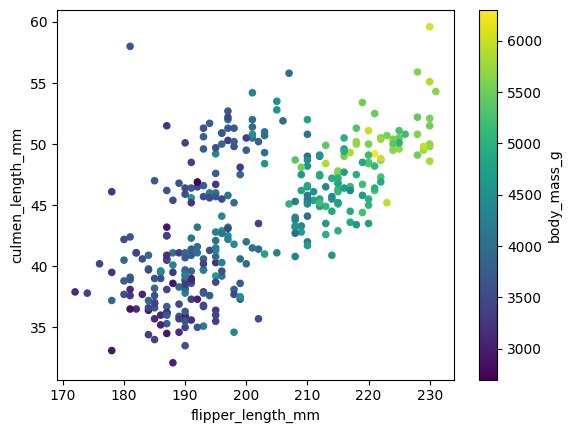

In [4]:
# con pandas
df.plot(
    kind='scatter',
    x='flipper_length_mm',
    y='culmen_length_mm',
    c='body_mass_g'
)

<Axes: xlabel='flipper_length_mm', ylabel='culmen_length_mm'>

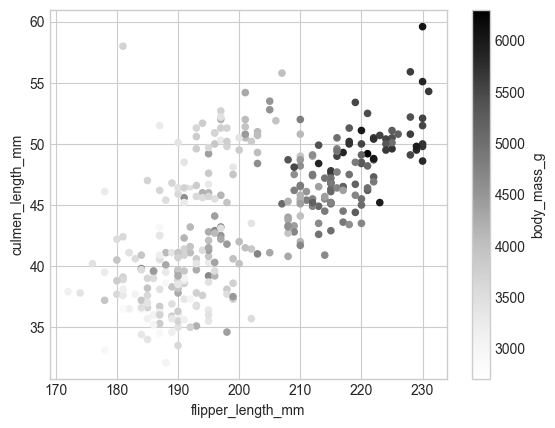

In [5]:
# con matplotlib
plt.style.use('seaborn-v0_8-whitegrid')
df.plot(
    kind='scatter',
    x='flipper_length_mm',
    y='culmen_length_mm',
    c='body_mass_g'
)

In [6]:
# con plotly
import plotly.express as px
fig = px.scatter(
    df,
    x='flipper_length_mm',
    y='culmen_length_mm',
    color='species'
)
fig.show()

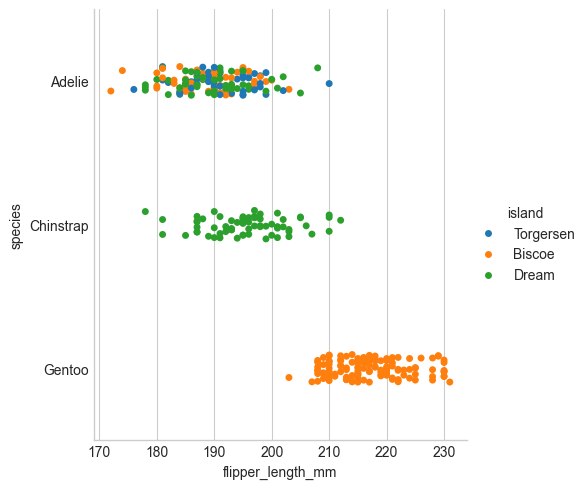

In [7]:
# ahora con seaborn
import seaborn as sns
sns.catplot(
    data=df,
    x='flipper_length_mm',
    y='species',
    hue='island'
)


## Grafico de Regresion

Es la misma scatter plot pero con una linea de tendencia.

In [8]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Calcular coheficiente de relacion entre 1 y -1

In [9]:
# seaborn tiene graficos de regresion
import seaborn as sns
sns.set_style('whitegrid')

In [10]:
# ciencia matematica
import scipy as sp

In [11]:
r, p = sp.stats.pearsonr( # pearson es la correlacion lineal
    df['flipper_length_mm'],
    df['culmen_length_mm']
)
print(f'correlacion: {r}, p-valor: {p}')

correlacion: 0.6521257442177316, p-valor: 7.874576982844369e-42


Text(220, 35, 'r=0.652125')

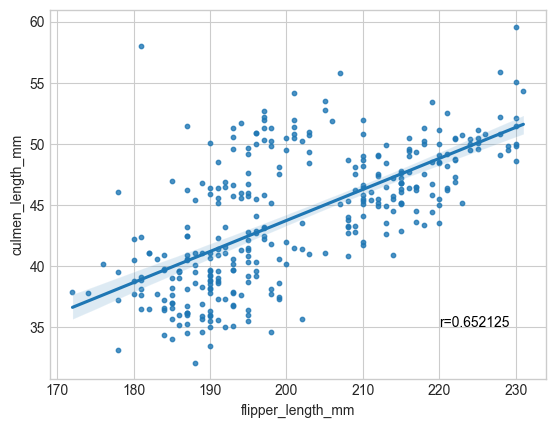

In [12]:
sns.regplot(
    data=df,
    x='flipper_length_mm',
    y='culmen_length_mm',
    scatter_kws={
        's':10, # tamaño de los puntos
    }
)

texto = 'r=' + str(r)[:8]

plt.text(
    220,35, # coordenadas xy
    texto, color='black'
)

## Join Plot

Una visualizacion por multiples visualizaciones como un scatter plot con histograma en sus ejes por tomar un ejemplo.

In [13]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


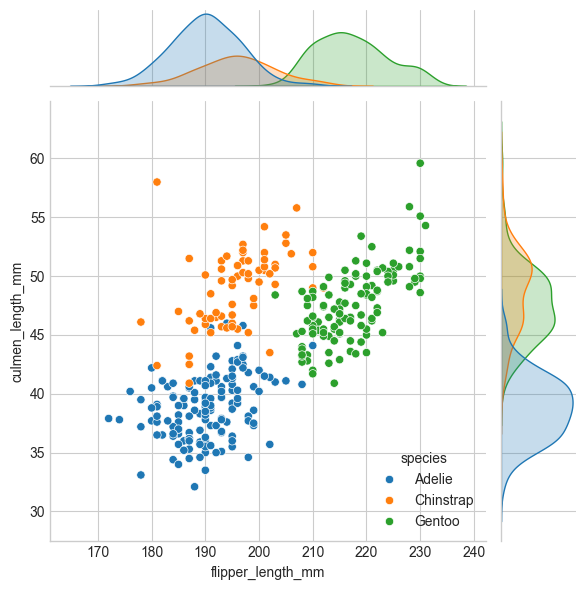

In [14]:
sns.jointplot(
    data=df,
    x='flipper_length_mm',
    y='culmen_length_mm',
    hue='species'
)

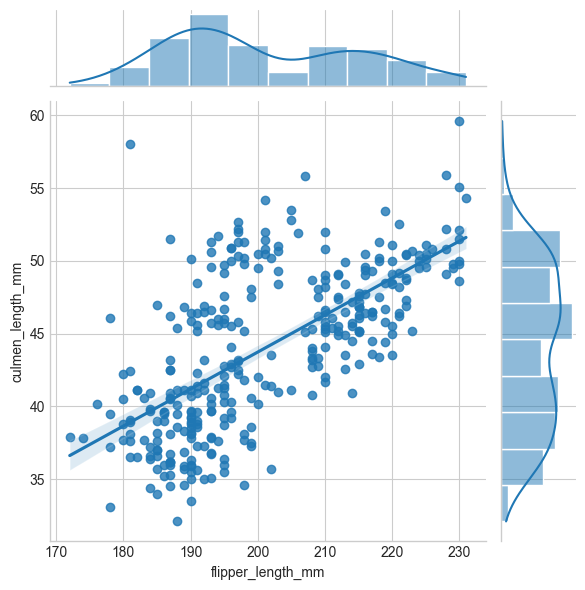

In [15]:
sns.jointplot(
    data=df,
    x='flipper_length_mm',
    y='culmen_length_mm',
    kind='reg'
)

## Pair Plot

Intenta ver al mismo tiempo todas las variables numericas del data set. Posiciona una variable pivote como un tabla, donde la diagonal es la variable contra ella misma donde se suele hacer es hacer un histograma o algo porque la correlacion es la misma.

In [16]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Mejor es ser selectivo por las columnas porque sino seria demasiado denso.

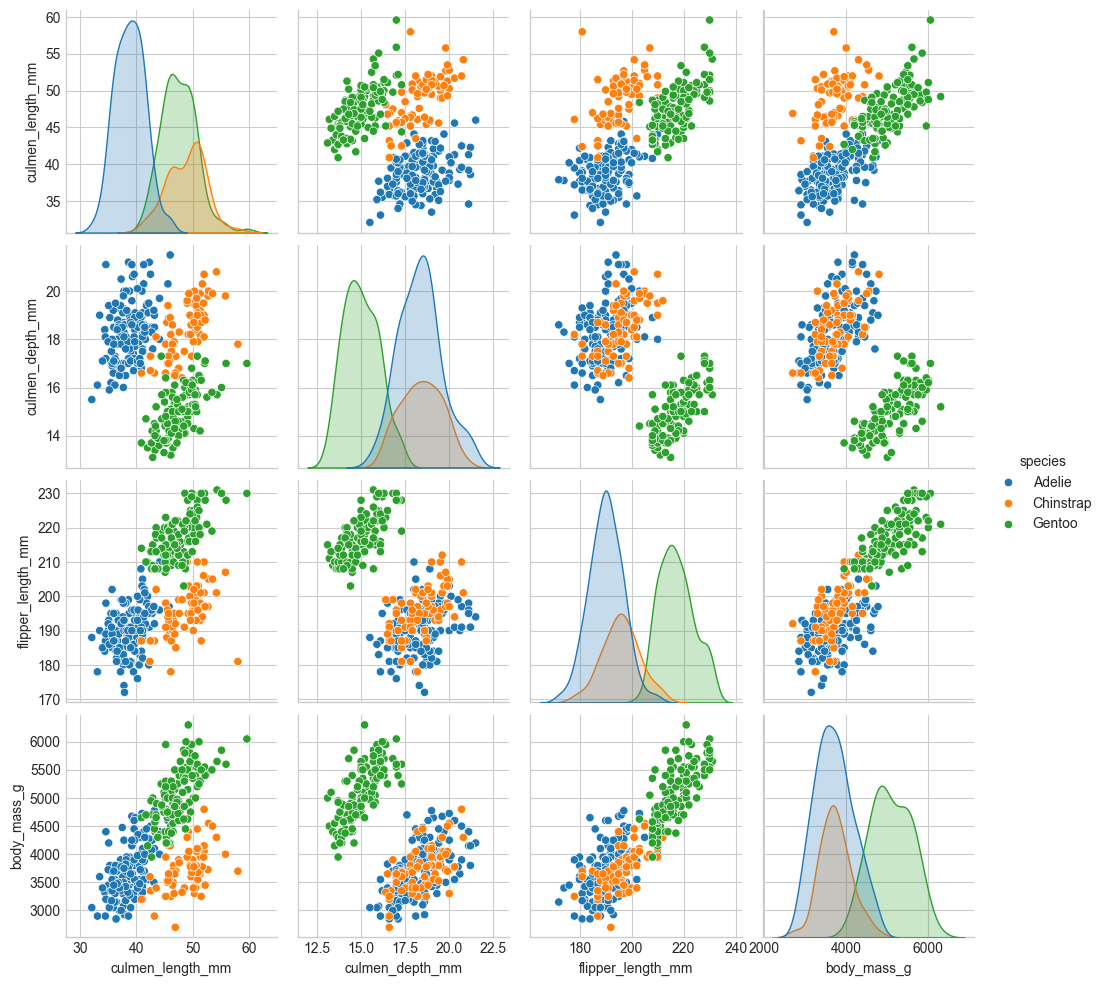

In [17]:
sns.pairplot(
    data=df,  
    hue='species',
    # kind='' # se pueden agregar tipos de ver los graficos
)

De aqui se ve cuales variables tiene mas correlacion e identificarlos para hacer regresiones y analisis en detalle.

## Grafico de Radar

Normaliza los ejes en un plano radial para identificar hacia que tendencia tienden estos grupos.

In [18]:
dfr = pd.read_csv('../data/restaurantes.csv')
dfr

,Nombre,Comida,Variedad,Servicio,Ambiente,Precio
0,Restaurante 1,4,4,5,4,3
1,Restaurante 2,5,5,4,5,2
2,Restaurante 3,3,4,5,3,5


In [19]:
import plotly.graph_objects as go

In [20]:
fig = go.Figure()
categorias = ['Comida', 'Variedad', 'Servicio', 'Ambiente', 'Precio']

fig.add_trace(
    go.Scatterpolar(
        r=dfr.iloc[0, 1:],
        theta=categorias,
        fill='toself',
        name='Restaurante A'
    )
)
fig.add_trace(
    go.Scatterpolar(
        r=dfr.iloc[1, 1:],
        theta=categorias,
        fill='toself',
        name='Restaurante B'
    )
)
fig.add_trace(
    go.Scatterpolar(
        r=dfr.iloc[2, 1:],
        theta=categorias,
        fill='toself',
        name='Restaurante C'
    )
)

fig.show()

In [21]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Ahora, medida de los pinguinos por cada especie.

In [22]:
agrup = df.groupby('species').agg({
    'culmen_length_mm':'mean',
    'culmen_depth_mm':'mean',
    'flipper_length_mm':'mean',
    'body_mass_g':'mean'
})
agrup

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.542500,15.002500,217.233333,5090.625000


In [23]:
categorias = agrup.columns
categorias

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

In [24]:
fig = go.Figure()

fig.add_trace(
    go.Scatterpolar(
        r=agrup.iloc[0, 1:],
        theta=categorias,
        fill='toself',
        name='Adelie'
    )
)
fig.add_trace(
    go.Scatterpolar(
        r=agrup.iloc[1, 1:],
        theta=categorias,
        fill='toself',
        name='Chinstrap'
    )
)
fig.add_trace(
    go.Scatterpolar(
        r=agrup.iloc[2, 1:],
        theta=categorias,
        fill='toself',
        name='Gentoo'
    )
)

fig.show()

Hay que normalizar porque estan mu disparejos en rangos.

In [25]:
dfp = df[categorias]
dfp_norm = (dfp - dfp.min()) / (dfp.max() - dfp.min()) # normalizacion min-max
dfp_norm['species'] = df['species']
dfp_norm

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species
0,0.254545,0.666667,0.152542,0.291667,Adelie
1,0.269091,0.511905,0.237288,0.305556,Adelie
2,0.298182,0.583333,0.389831,0.152778,Adelie
4,0.167273,0.738095,0.355932,0.208333,Adelie
5,0.261818,0.892857,0.305085,0.263889,Adelie
...,...,...,...,...,...
338,0.549091,0.071429,0.711864,0.618056,Gentoo
340,0.534545,0.142857,0.728814,0.597222,Gentoo
341,0.665455,0.309524,0.847458,0.847222,Gentoo
342,0.476364,0.202381,0.677966,0.694444,Gentoo


In [26]:
agrup = dfp_norm.groupby('species').mean()
agrup

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,0.244508,0.624674,0.306826,0.279490
Chinstrap,0.608503,0.633403,0.403789,0.286969
Gentoo,0.561545,0.226488,0.766667,0.664062


In [27]:
fig = go.Figure()

fig.add_trace(
    go.Scatterpolar(
        r=agrup.iloc[0, :],
        theta=categorias,
        fill='toself',
        name='Adelie'
    )
)
fig.add_trace(
    go.Scatterpolar(
        r=agrup.iloc[1, :],
        theta=categorias,
        fill='toself',
        name='Chinstrap'
    )
)
fig.add_trace(
    go.Scatterpolar(
        r=agrup.iloc[2, :],
        theta=categorias,
        fill='toself',
        name='Gentoo'
    )
)

fig.show()

## Grafico de Burbuja

In [29]:
dfv = pd.read_csv('../data/paises_vida.csv',index_col='index')
dfv

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
index,,,,,,,,
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716


correlacion entre producto interno bruto y la poblacion en 2002.

In [30]:
dfv.dropna()
dfv

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
index,,,,,,,,
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716


In [31]:
dfv_2002 = dfv[dfv['year']==2002]
dfv_2002

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
index,,,,,,,,
10,Afghanistan,Asia,2002,42.129,25268405,726.734055,AFG,4
22,Albania,Europe,2002,75.651,3508512,4604.211737,ALB,8
34,Algeria,Africa,2002,70.994,31287142,5288.040382,DZA,12
46,Angola,Africa,2002,41.003,10866106,2773.287312,AGO,24
58,Argentina,Americas,2002,74.340,38331121,8797.640716,ARG,32
...,...,...,...,...,...,...,...,...
1654,Vietnam,Asia,2002,73.017,80908147,1764.456677,VNM,704
1666,West Bank and Gaza,Asia,2002,72.370,3389578,4515.487575,PSE,275
1678,"Yemen, Rep.",Asia,2002,60.308,18701257,2234.820827,YEM,887


In [34]:
fig = px.scatter(
    dfv_2002,
    x='gdpPercap',
    y='lifeExp',
    size='pop',
    size_max=60
)
fig.show()

In [ ]:
fig = px.scatter(
    dfv_2002,
    x='gdpPercap',          # eje x producto interno bruto per capita
    y='lifeExp',            # correlacion entre producto interno bruto y la esperanza de vida
    size='pop',             # tamaño de los puntos por poblacion
    size_max=60,            # tamaño maximo de los puntos
    log_x=True,             # eje x en escala logaritmica
    color='continent',      # para que los puntos se coloreen por continente
    hover_name='country',   # para que al pasar el mouse muestre el pais
)
fig.show()

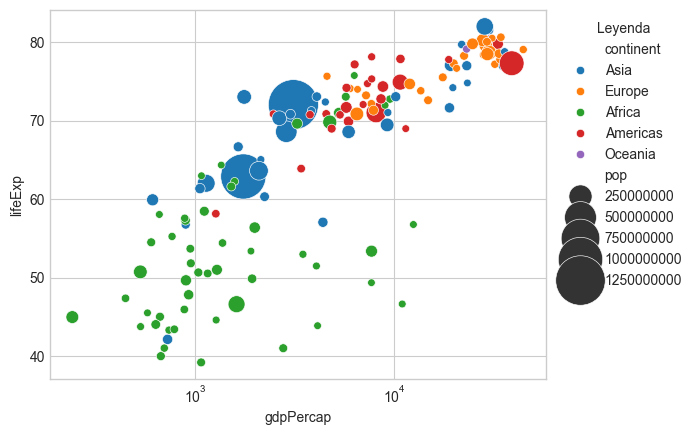

In [40]:
sns.set_style('whitegrid')

sns.scatterplot(
    data=dfv_2002,
    x='gdpPercap',
    y='lifeExp',
    size='pop',
    hue='continent',
    sizes=(30,1300),
    legend=True
)
plt.xscale('log')
plt.legend(
    bbox_to_anchor=(1.3,1),
    loc='upper right',
    title='Leyenda'
)

## Grafico de lineas multiples

In [41]:
dfv

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
index,,,,,,,,
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716


Grafico de lineas dobles codifica los datos mostrando otro eje y con otra escala, claramente es una grafica especial para manejar datos de forma twin como comparacion de cambios de magnitudes de maximo 2 variables. Claramente se pueden colocar mas ejes y como se necesiten.

In [42]:
dfv_asia = dfv[dfv['continent']=='Asia']
dfv_asia_agrup = dfv_asia.groupby('year').agg({
    'lifeExp':'mean',
    'gdpPercap':'mean'
})
dfv_asia_agrup

,lifeExp,gdpPercap
year,,
1952,46.314394,5195.484004
1957,49.318544,5787.732940
1962,51.563223,5729.369625
1967,54.663640,5971.173374
1972,57.319269,8187.468699
1977,59.610556,7791.314020
1982,62.617939,7434.135157
1987,64.851182,7608.226508
1992,66.537212,8639.690248


<Axes: xlabel='year'>

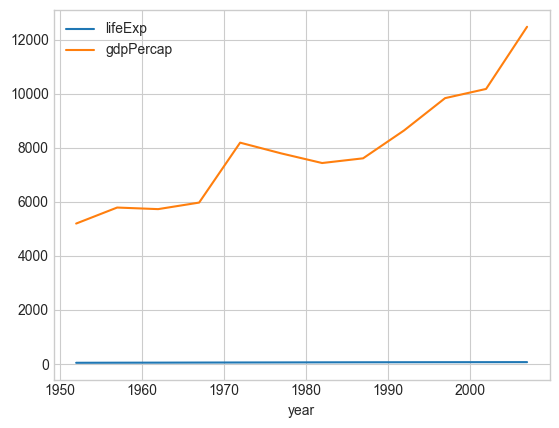

In [43]:
dfv_asia_agrup.plot.line(
    y=['lifeExp','gdpPercap'],
    grid=True,
)

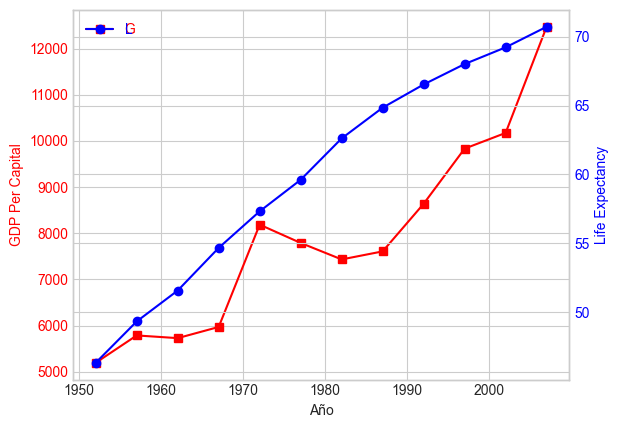

In [54]:
fig, ax1 = plt.subplots()

ax1.plot(
    dfv_asia_agrup.index.values,
    dfv_asia_agrup['gdpPercap'],
    color='red',
    marker='s'
)
ax1.set_ylabel('GDP Per Capital',color='red')
ax1.set_xlabel('Año')
ax1.tick_params(
    axis='y',
    labelcolor='red'
)
ax1.legend(title='',
           labels='GDP Per Capital',
           labelcolor='red'
)

ax2 = ax1.twinx()

ax2.plot(
    dfv_asia_agrup.index.values,
    dfv_asia_agrup['lifeExp'],
    color='blue',
    marker='o'
)
ax2.set_ylabel('Life Expectancy',color='blue')
ax2.tick_params(
    axis='y',
    labelcolor='blue'
)
ax2.legend(title='',
           labels='Life Expectancy',
           labelcolor='blue'
)

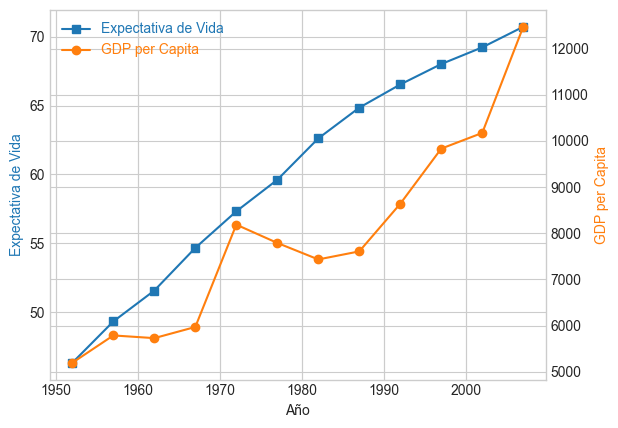

In [57]:
# Grafico de lineas con doble eje Y
# https://matplotlib.org/stable/gallery/axes_grid1/parasite_simple.html#sphx-glr-gallery-axes-grid1-parasite-simple-py
from mpl_toolkits.axes_grid1 import host_subplot
host = host_subplot(111)
par = host.twinx()

host.set_xlabel("Año")
host.set_ylabel("Expectativa de Vida")
par.set_ylabel("GDP per Capita")

p1, = host.plot(
    dfv_asia_agrup.index.values, 
    dfv_asia_agrup['lifeExp'], 
    label="Expectativa de Vida",
    marker='s'
)

p2, = par.plot(
    dfv_asia_agrup.index.values, 
    dfv_asia_agrup['gdpPercap'], 
    label="GDP per Capita",
    marker='o'
)

# Para mapear las lineas a los colores
host.legend(labelcolor="linecolor")
host.yaxis.get_label().set_color(p1.get_color())
par.yaxis.get_label().set_color(p2.get_color())

plt.grid(True)
plt.show()

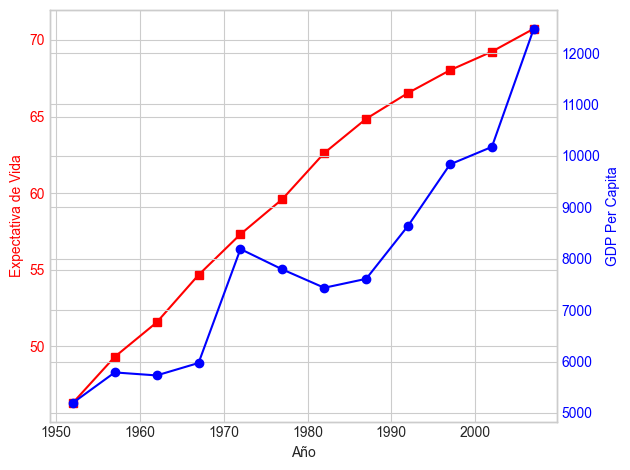

In [58]:
# Metodo antiguo en Matplotlib
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html#sphx-glr-gallery-subplots-axes-and-figures-two-scales-py
fig, ax1 = plt.subplots()

ax1.set_xlabel('Año')
ax1.set_ylabel('Expectativa de Vida', color='red')
ax1.plot(    
    dfv_asia_agrup.index.values, 
    dfv_asia_agrup['lifeExp'],  
    color='red',
    marker='s'
)
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()

ax2.set_ylabel('GDP Per Capita', color='blue')  # we already handled the x-label with ax1
ax2.plot(
    dfv_asia_agrup.index.values, 
    dfv_asia_agrup['gdpPercap'], 
    color='blue',
    marker='o'
)
ax2.tick_params(axis='y', labelcolor='blue')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Grafico de Barras y Lineas

In [55]:
dfv

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
index,,,,,,,,
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716


In [60]:
dfv_africa = dfv[dfv['continent']=='Africa']
dfv_africa_agrup = dfv_africa.groupby('year').agg({
    'gdpPercap': 'mean',
    'lifeExp': 'mean',
    'pop':'sum'
}).reset_index()
dfv_africa_agrup

,year,gdpPercap,lifeExp,pop
0,1952,1252.572466,39.135500,237640501
1,1957,1385.236062,41.266346,264837738
2,1962,1598.078825,43.319442,296516865
3,1967,2050.363801,45.334538,335289489
4,1972,2339.615674,47.450942,379879541
5,1977,2585.938508,49.580423,433061021
6,1982,2481.592960,51.592865,499348587
7,1987,2282.668991,53.344788,574834110
8,1992,2281.810333,53.629577,659081517
9,1997,2378.759555,53.598269,743832984


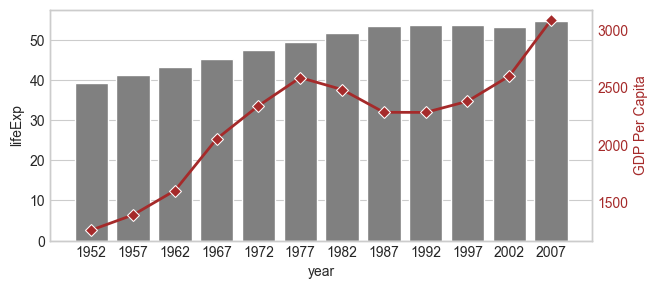

In [71]:
fig, ax1 = plt.subplots(
    figsize=(7,3)
)

sns.barplot(
    data=dfv_africa_agrup,
    x='year',
    y='lifeExp',
    color = 'gray',
    ax=ax1
)

ax2 = ax1.twinx()

sns.lineplot(
    data=dfv_africa_agrup['gdpPercap'],
    ax=ax2,
    color='brown',
    linewidth=2,
    marker='D'
)

ax2.tick_params(
    axis='y',
    labelcolor='brown',
)
ax2.set_ylabel(
    'GDP Per Capita', 
    color='brown'
)
ax2.grid(
    visible=False
)

In [67]:
df_agrupado = dfv.groupby(['year', 'continent']).agg({
    'lifeExp': np.mean,
    'pop': np.sum,
    'gdpPercap': np.sum
})
df_agrupado = df_agrupado.reset_index()
df_agrupado

C:\Users\Scort\AppData\Local\Temp\ipykernel_24564\1688174244.py:1: FutureWarning:

The provided callable <function mean at 0x0000013C774C74C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

C:\Users\Scort\AppData\Local\Temp\ipykernel_24564\1688174244.py:1: FutureWarning:

The provided callable <function sum at 0x0000013C774C60C0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



,year,continent,lifeExp,pop,gdpPercap
0,1952,Africa,39.135500,237640501,65133.768223
1,1952,Americas,53.279840,345152446,101976.563805
2,1952,Asia,46.314394,1395357351,171450.972133
3,1952,Europe,64.408500,418120846,169831.723043
4,1952,Oceania,69.255000,10686006,20596.171300
5,1957,Africa,41.266346,264837738,72032.275237
6,1957,Americas,55.960280,386953916,115401.093329
7,1957,Asia,49.318544,1562780599,190995.187018
8,1957,Europe,66.703067,437890351,208890.384478
9,1957,Oceania,70.295000,11941976,23197.044910


In [69]:
# Datos para el grafico de linea
df_agrupado_pop = dfv.groupby(['year']).agg({
    'pop': np.sum,
})
df_agrupado_pop = df_agrupado_pop.reset_index()
df_agrupado_pop

C:\Users\Scort\AppData\Local\Temp\ipykernel_24564\1352581535.py:2: FutureWarning:

The provided callable <function sum at 0x0000013C774C60C0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



,year,pop
0,1952,2406957150
1,1957,2664404580
2,1962,2899782974
3,1967,3217478384
4,1972,3576977158
5,1977,3930045807
6,1982,4289436840
7,1987,4691477418
8,1992,5110710260
9,1997,5515204472


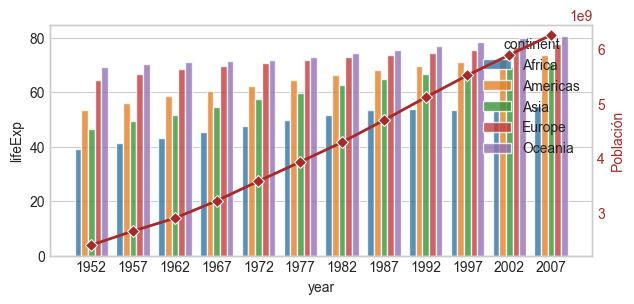

In [70]:
fig, ax1 = plt.subplots(figsize=(7,3))

sns.barplot(
    data=df_agrupado,
    x='year',
    y='lifeExp',
    alpha=0.8,
    hue='continent',
)
ax1.set_axisbelow(True)

ax2 = ax1.twinx()

line_color = 'brown'
ax2.set_ylabel('Población', color=line_color)
sns.lineplot(
    data=df_agrupado_pop['pop'],
    alpha=1,
    marker='D',
    ax=ax2,
    linewidth=2,
    color=line_color
)

ax2.tick_params(axis='y', labelcolor=line_color)

ax2.set_axisbelow(True)
ax2.grid(visible=False)

plt.show()

## Mapa de Calor o HeatMap

En el caso numerico se ve como una cuadricula.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [6]:
# Leemos los datos con Pandas
dfp = pd.read_csv('../data/pinguinos.csv')
dfp = dfp.dropna()
dfp

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Text(0.5, 1.0, 'Longitud de las aletas vs longitud del pico')

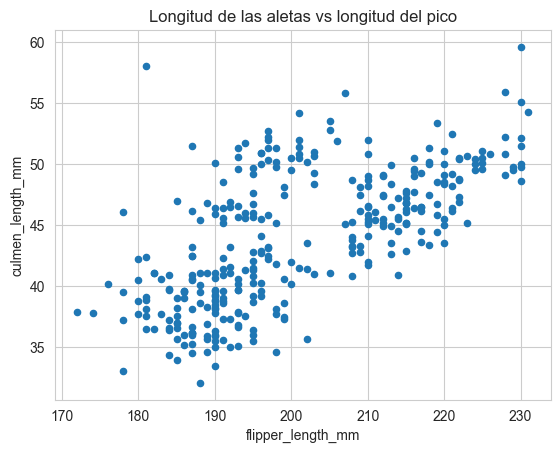

In [7]:
dfp.plot.scatter(
    x='flipper_length_mm',
    y='culmen_length_mm'
)
plt.title('Longitud de las aletas vs longitud del pico')

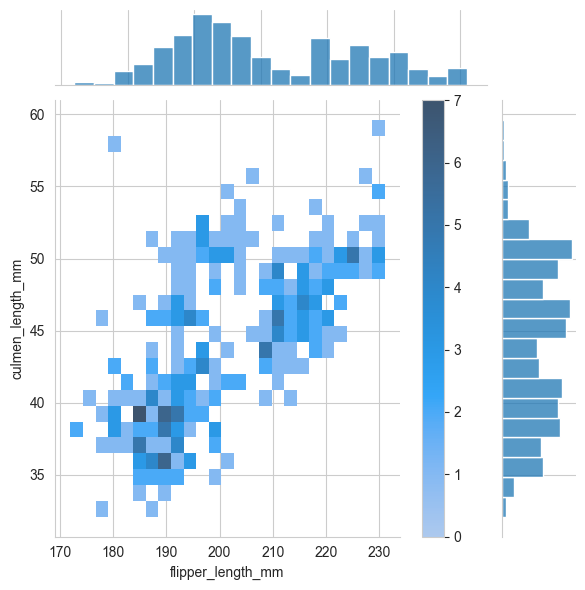

In [ ]:
sns.jointplot(
    data=dfp,
    x='flipper_length_mm',
    y='culmen_length_mm',
    kind='hist',
    joint_kws={ # configurar el grafico central
        'bins':25,
    },
    marginal_kws={  # configurar los graficos de los costados
        'bins':20,  # numero de barras
        'fill':True # rellenar las barras
    },
    cbar=True   # mostrar barra de color
)
plt.show()

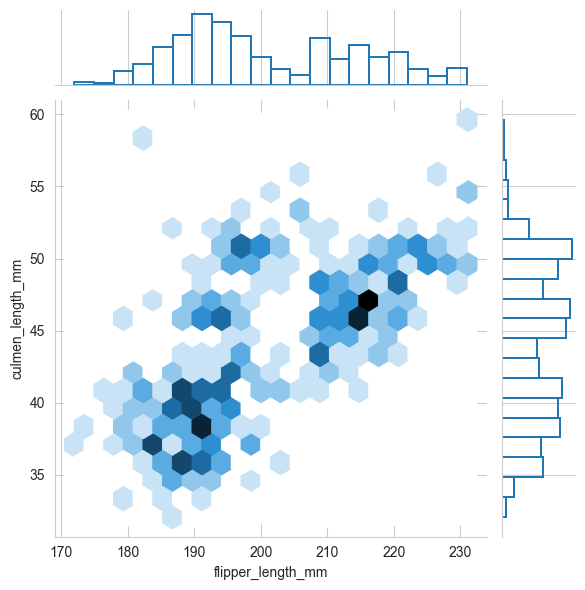

In [14]:
sns.jointplot(
    data=dfp,
    x='flipper_length_mm',
    y='culmen_length_mm',
    kind='hex',
    joint_kws={ # configurar el grafico central
        'bins':25,
    },
    marginal_kws={  # configurar los graficos de los costados
        'bins':20,  # numero de barras
        'fill':False # rellenar las barras
    },
    gridsize=20 # tamaño de la cuadricula del grafico central entre mas grande mas pequeño
)
plt.show()

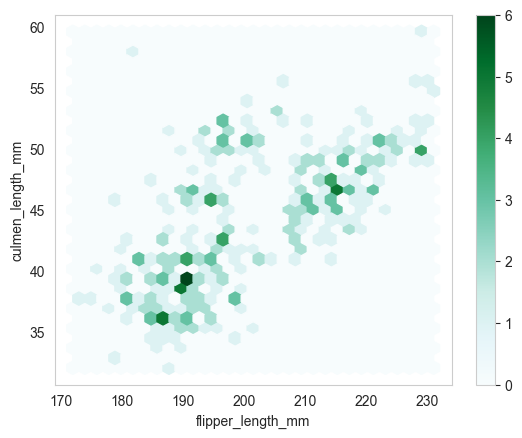

In [15]:
dfp.plot.hexbin(
    x='flipper_length_mm',
    y='culmen_length_mm',
    gridsize=30
)
plt.grid(False)
plt.show()

## Heatmap Categorico

In [16]:
dfp_agrup = dfp.groupby(['species','island']).count()[['sex']]
dfp_agrup

sex
species   island        
Adelie    Biscoe      44
          Dream       55
          Torgersen   47
Chinstrap Dream       68
Gentoo    Biscoe     120

In [ ]:
pivote = dfp_agrup.unstack().droplevel(0,axis=1) # quitar el nivel 0 de las columnas y re construye la matriz
pivote

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44.0,55.0,47.0
Chinstrap,NaN,68.0,NaN
Gentoo,120.0,NaN,NaN


<Axes: xlabel='island', ylabel='species'>

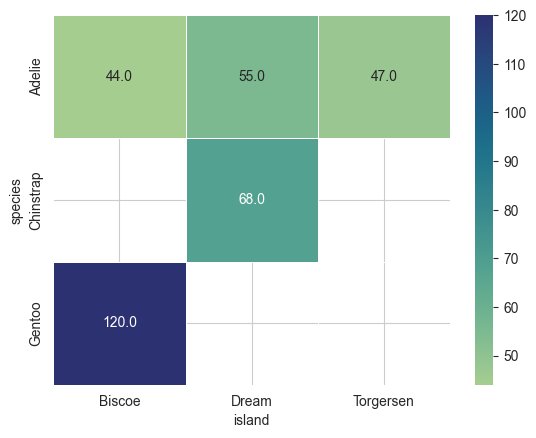

In [18]:
# Heatmap de variables categóricas que codifican una variable numérica
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(
    pivote,
    annot=True,
    cmap="crest",
    linewidth=0.5,
    fmt=".1f"
)

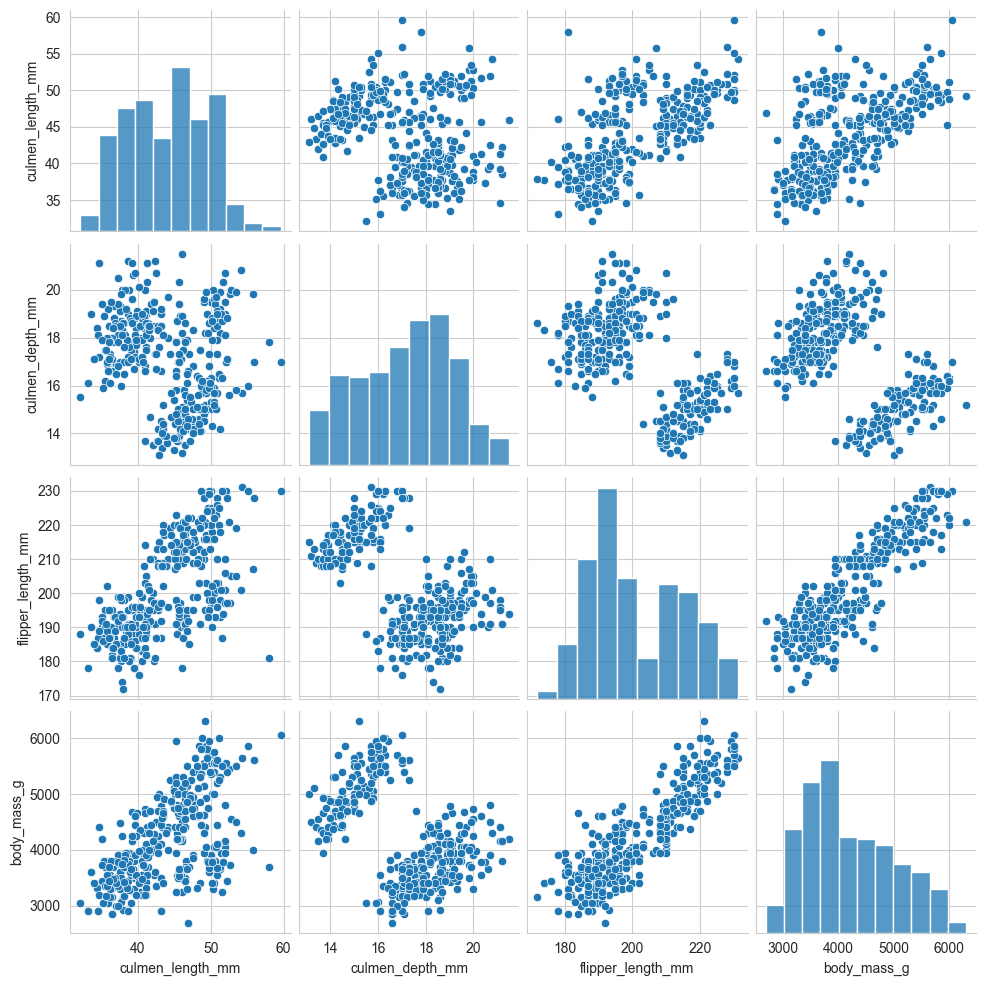

In [20]:
sns.pairplot(
    dfp[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
)

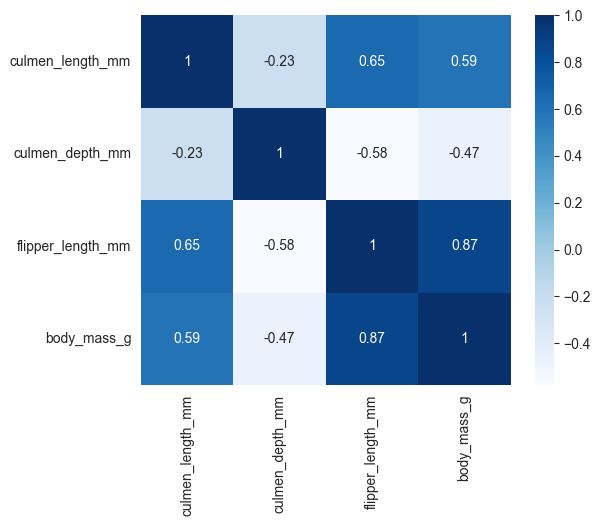

In [34]:
# Heatmap de Correlación
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Calculo los coeficientes de correlacion lineal entre mis variables
df_cor = dfp[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()
sns.heatmap(
    df_cor,
    annot=True,
    cmap='Blues',
    square=True
)

palette = sns.color_palette("Blues_d",n_colors=15)
palette.reverse()

In [23]:
df_cor

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228640,0.652126,0.589066
culmen_depth_mm,-0.228640,1.000000,-0.578730,-0.472987
flipper_length_mm,0.652126,-0.578730,1.000000,0.873211
body_mass_g,0.589066,-0.472987,0.873211,1.000000


In [31]:
dft = pd.read_csv('../data/tienda_ventas.csv')
dft = dft.dropna()
dft['periodo'] = dft['date'].apply(lambda x: x[:7])
dft

,id,date,store_nbr,family,sales,onpromotion,periodo
0,0,2013-01-01,1,AUTOMOTIVE,0.00000,0,2013-01
1,1,2013-01-01,1,BABY CARE,0.00000,0,2013-01
2,2,2013-01-01,1,BEAUTY,0.00000,0,2013-01
3,3,2013-01-01,1,BEVERAGES,0.00000,0,2013-01
4,4,2013-01-01,1,BOOKS,0.00000,0,2013-01
...,...,...,...,...,...,...,...
2161561,2161561,2016-04-30,9,POULTRY,826.35300,0,2016-04
2161562,2161562,2016-04-30,9,PREPARED FOODS,165.65399,0,2016-04
2161563,2161563,2016-04-30,9,PRODUCE,2012.72700,1,2016-04
2161564,2161564,2016-04-30,9,SCHOOL AND OFFICE SUPPLIES,10.00000,0,2016-04


In [32]:
dft = dft[dft['store_nbr'].isin([3,44,45,46,47,48,49,50])]
dft

,id,date,store_nbr,family,sales,onpromotion,periodo
726,726,2013-01-01,3,AUTOMOTIVE,0.00000,0,2013-01
727,727,2013-01-01,3,BABY CARE,0.00000,0,2013-01
728,728,2013-01-01,3,BEAUTY,0.00000,0,2013-01
729,729,2013-01-01,3,BEVERAGES,0.00000,0,2013-01
730,730,2013-01-01,3,BOOKS,0.00000,0,2013-01
...,...,...,...,...,...,...,...
2161297,2161297,2016-04-30,50,POULTRY,593.52400,0,2016-04
2161298,2161298,2016-04-30,50,PREPARED FOODS,170.45999,0,2016-04
2161299,2161299,2016-04-30,50,PRODUCE,2994.39300,1,2016-04
2161300,2161300,2016-04-30,50,SCHOOL AND OFFICE SUPPLIES,13.00000,0,2016-04


In [33]:
dft = dft.groupby(['periodo','store_nbr']).agg({
    'sales':'sum'
})
dft

sales
periodo store_nbr              
2013-01 3          4.965743e+05
        44         6.763951e+05
        45         5.394207e+05
        46         4.851985e+05
        47         5.328300e+05
...                         ...
2016-04 46         9.085644e+05
        47         1.158896e+06
        48         7.901695e+05
        49         1.100845e+06
        50         6.022959e+05

[320 rows x 1 columns]

Ahora, para convertir los datos en un mapa de calor hay que convertir esa tabla en una tabla con la forma.

In [36]:
matriz = dft.unstack().droplevel(0,axis=1).transpose()
matriz

periodo,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04
store_nbr,,,,,,,,,,,,,,,,,,,,,
3,496574.280985,429618.648974,531686.223879,512072.124974,518197.344186,544387.722974,517335.848845,532537.992913,553040.497954,549129.845189,...,1.090623e+06,1.104795e+06,1.143363e+06,1.154247e+06,1.131927e+06,1.266646e+06,1.178500e+06,1.050255e+06,1.110348e+06,1.209713e+06
44,676395.138954,595527.551012,697303.868000,666954.222780,672681.377906,666303.585030,637568.579971,654104.371982,685715.165820,664588.899780,...,1.236124e+06,1.333194e+06,1.355429e+06,1.384719e+06,1.340310e+06,1.497707e+06,1.383672e+06,1.218532e+06,1.296019e+06,1.501871e+06
45,539420.676079,503479.819965,601584.635970,557200.458882,576410.815940,591454.381316,554255.958018,565709.937040,585876.476739,579700.235145,...,1.119165e+06,1.165197e+06,1.111998e+06,1.137089e+06,1.171939e+06,1.350416e+06,1.226709e+06,1.108178e+06,1.131824e+06,1.328977e+06
46,485198.490116,446971.842070,531634.404456,486555.474044,502340.002993,510167.572082,480729.412897,500779.807575,515900.194888,505165.404070,...,8.615049e+05,8.265581e+05,8.241437e+05,8.617642e+05,8.470109e+05,1.041412e+06,8.850564e+05,7.770451e+05,8.089981e+05,9.085644e+05
47,532830.024953,477916.973850,578854.175901,524800.597078,537680.008065,549332.645889,493788.664091,507404.715962,571775.975106,568528.162178,...,1.026461e+06,1.039515e+06,1.086786e+06,1.131799e+06,1.107007e+06,1.264874e+06,1.154481e+06,1.028481e+06,1.078566e+06,1.158896e+06
48,393039.644168,369976.821263,447756.715286,413425.020003,421302.961073,436320.137003,401904.368981,417463.436092,445250.058918,432686.653010,...,7.349772e+05,7.056176e+05,7.154095e+05,7.644686e+05,7.504672e+05,9.127878e+05,7.775612e+05,6.717679e+05,6.999251e+05,7.901695e+05
49,291891.128982,258320.141966,325003.586018,312894.258091,328580.093051,329014.434985,309582.340983,324705.513098,358836.727011,368756.502042,...,9.099109e+05,9.706920e+05,1.037610e+06,1.012850e+06,1.006192e+06,1.181605e+06,1.057335e+06,9.416089e+05,1.009509e+06,1.100845e+06
50,341249.754079,323027.227966,374337.286047,348366.691837,361603.265001,356335.724030,355119.079156,354176.408970,360904.547880,361603.736975,...,5.661308e+05,5.808498e+05,5.483830e+05,5.767117e+05,5.709456e+05,7.393193e+05,5.895854e+05,5.518365e+05,5.515380e+05,6.022959e+05


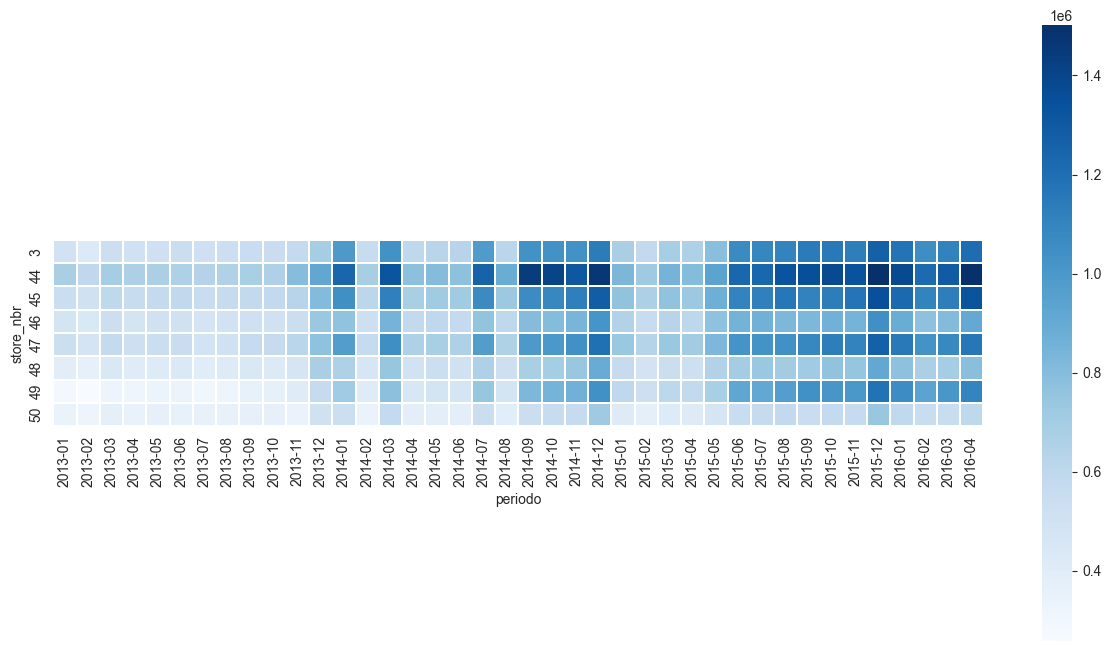

In [39]:
# Segundo ejemplo de un Heatmap de dos variables categóricas que codifican una variable numérica
plt.figure(figsize=(15, 8))
ax = sns.heatmap(
    matriz,
    square=True, # Me genera cuadraditos simetricos
    cmap="Blues",
    linewidth=0.1,
    #annot=True,
)
plt.show()

## HeatMap de Correlacion

In [40]:
dfp

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [42]:
matriz = dfp[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()
matriz

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228640,0.652126,0.589066
culmen_depth_mm,-0.228640,1.000000,-0.578730,-0.472987
flipper_length_mm,0.652126,-0.578730,1.000000,0.873211
body_mass_g,0.589066,-0.472987,0.873211,1.000000


<Axes: >

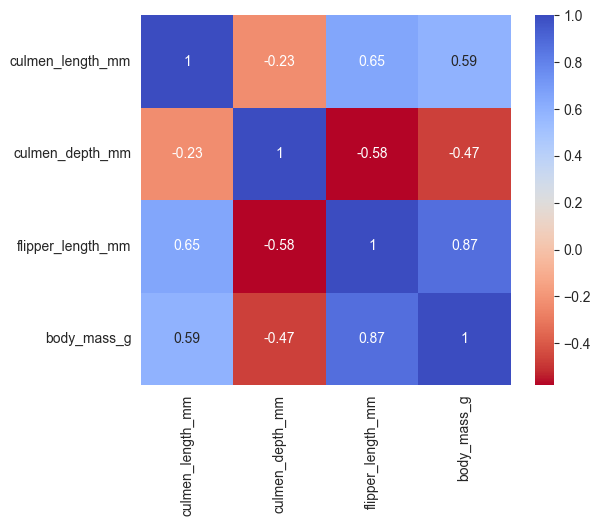

In [46]:
sns.heatmap(
    matriz,
    #cmap='Blues',
    #Diverging colormap
    cmap='coolwarm_r',
    square=True,
    annot=True,
)

## Diagrama de Coordenadas Paralelas

In [47]:
dfp

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [50]:
import plotly.express as px

In [51]:
fig = px.parallel_coordinates(
    dfp,
    dimensions=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'],
)
fig.show()

In [53]:
# se necesita cambiar categorias a valores numericos
dfp['species_id'] = dfp['species'].astype('category').cat.codes
dfp

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species_id
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,2
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,2
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,2
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,2


In [54]:
fig = px.parallel_coordinates(
    dfp,
    color='species_id',
    dimensions=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'],
    color_continuous_scale=px.colors.diverging.Tealrose,
)
fig.show()

# Cuestionario

![img 1](images/1.webp)

Pregunta 1.

Esta visualización es ambigua. No podemos saber si el valor escrito en los segmentos del gráfico de dona están representando porcentajes o no. En caso de hacerlo, estaría errada la visualización debido a que no suman 100%. Además los segmentos son demasiado similares entre sí lo cual hace a la visualización poco útil. Finalmente, el uso de colores no esta justificado.

![img 2](./images/2.webp)

Pregunta 1. ¿Existe alguna clara deficiencia en esta visualización?

En mi opinión la forma de mostrar el significado de cada segmento no es la mejor. Sin embargo, NO hay una clara deficiencia que haga que la visualización sea totalmente inutilizable.

Pregunta 2. ¿Cómo podrías mejorar esta visualización?

1) Agregar los valores porcentuales a cada pedazo del Pie como texto.
2) Disminuyendo el tamaño del texto que indica el tipo de sangre

![img 3](./images/3.webp)

Titulo: Cuales son las fuentes de energía mas seguras y limpias?

Subtitulo: Los ejes X y Y utilizan escalas cuadráticas | Tamaño = Porción de la producción global de energía

Eje Y: Emisión de Gases invernaderos (en toneladas de CO2 por gigawatt/hora)

Eje X: Muertes por Terawatt/hora

Texto de la Flecha: El carbón tiene 1230 veces más muertes y 273 veces mas emisiones que la energía Nuclea

Pregunta 1. ¿Existe alguna clara deficiencia en esta visualización?

No! (En mi opinión). La visualización está bien lograda. Cada componente esta explicada. Y es completamente útil y legible. EI uso de colores es correcto, y el Grid ayuda a codificar los valores.

Pregunta 2. ¿Cómo podrías mejorar esta visualización?

Podríamos considerar añadiendo una leyenda para el tamaño de las burbujas para mayor detalle.

![img 4](./images/4.webp)

Titulo: % de personas que creen que la vacunación es segura, por país y por región global

Subtitulo: Las lineas oscuras verticales representan la mediana de la región

Pregunta 1. ¿Existe alguna clara deficiencia en esta visualización?

Este gráfico es demasiado complejo para ser entendido a primera vista. Además, el Eje Y no tiene un significado claro. Probablemente un scatter plot no era la mejor opción para presentar estos hallazgos.

Pregunta 2. ¿Cómo podrías mejorar esta visualización?

Podríamos intentar representándolo de una mejor manera con 5 diagramas de cajas, En este también podríamos resaltar puntos individuales. Además, reduciríamos el tamaño del gráfico y dibujar puntos que se extienden a 10 largo del Eje Y innecesariamente. También podemos utilizar un scatter plot categórico para mitigar este mismo problema.

![img 5](./images/5.webp)

Titulo: El crecimiento del mercado de préstamos

Subtitulo: A lo largo de los últimos 10 años

Pregunta 1. ¿Existe alguna clara deficiencia en esta visualización?

La diferencia entre las magnitudes no son tangibles. Si eliminamos los números de cada burbuja, habrían burbujas donde la diferencia seria imperceptible. Definitivamente no es una buena representación para visualizar diferencias de magnitudes.

Pregunta 2. ¿Cómo podrías mejorar esta visualización?

Una mejor representación sería un gráfico de líneas múltiples donde veamos claramente como va
fluctuando a 10 largo del tiempo cada valor del Eje Y. Incluso un gráfico de barras haría un mejor
trabajo que este uso de las burbujas.

![img 6](./images/6.webp)

Pregunta 1. Sin necesidad de las traducciones, ¿cuáles son los problemas de esta visualización?

1) La visualización tiene demasiadas variables graficadas. 
2) Las líneas utilizan colores muy similares entre sí. 
3) No hay razón aparente para utilizar barras en ves de líneas en solo una variable. 
4) No se entiende cual variable utiliza el Eje Y izquierdo y cual el Eje Y derecho.

Pregunta 2. ¿Cómo podrías mejorar esta visualización?

Separar la visualización en varios subgráficos aliviaría la carga.